In [1]:
from rgb_anything_v1.dpt import RGBAnything
from torch import nn
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import Compose

xFormers not available
xFormers not available


In [2]:
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}


net = RGBAnything(**model_configs['vits'])

(numpy.ndarray, (1080, 2538, 3))

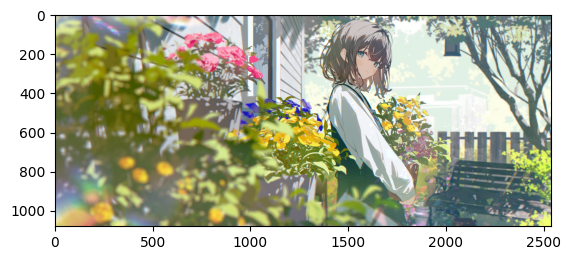

In [4]:
image_path = r'data\gallery\2025_08_08_02_02_IMG_8783.png'
raw_img = cv2.imread(image_path)
img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
type(img), img.shape

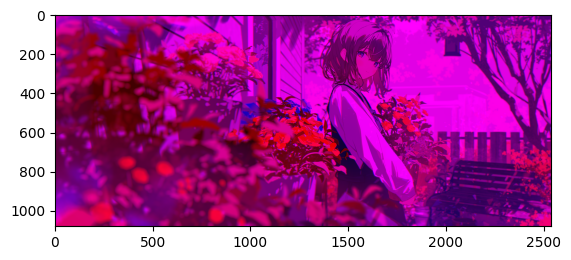

In [32]:
img_rb = img[:, :, [0, 2]]  # 提取红色和蓝色通道
img_r0b = img
img_r0b[:, :, 1] = 0  # 将绿色通道设为0
plt.imshow(img_r0b)

In [7]:
image, (h, w) = net.image2tensor(raw_img, input_size=518)
image.shape, h, w

(torch.Size([1, 2, 518, 1218]), 1080, 2538)

In [10]:
y = net(image)

In [18]:
def uniform(m):
    if type(m) in [nn.Linear, nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)
net.apply(uniform)

RGBAnything(
  (pretrained): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(2, 384, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-11): 12 x NestedTensorBlock(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=384, out_features=1152, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=384, out_features=384, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        

In [20]:
y = net(image)
y.max

<function Tensor.max>

In [ ]:
y.shape, 